In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data uploading and exploration
Loading the hourly energy consumption dataset
Inspecting the first few rows to understand the structure and content of the data


In [2]:
URL='AEP_hourly 2.csv'
df=pd.read_csv(URL)

In [3]:
df.head(10)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0
6,2004-12-31 07:00:00,13692.0
7,2004-12-31 08:00:00,14297.0
8,2004-12-31 09:00:00,14719.0
9,2004-12-31 10:00:00,14941.0


In [4]:
df.shape

(121273, 2)

In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


### Data Cleaning and Preprocessing
Converting the 'Datetime' column to datetime format for easy manipulation
Extracting granular components (Date, Time, Year, Month, Day, etc.)
This helps in understanding seasonality or time-based trends in energy consumption


In [7]:
#changing type of the Datetime column
df['Datetime']=pd.to_datetime(df['Datetime'])

In [16]:
#Creating new columns by seperating Datetime column as Date, Time, Year, Month, Day, Weekdays
df['Date']=df['Datetime'].dt.date
df['Date']=pd.to_datetime(df['Date'])
df['Time']=df['Datetime'].dt.time

# Extract year, month, and day into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday_name'] = df['Date'].dt.day_name()
df['Weekday'] = df['Date'].dt.weekday

In [17]:
df['Date']

0        2004-12-31
1        2004-12-31
2        2004-12-31
3        2004-12-31
4        2004-12-31
            ...    
121268   2018-01-01
121269   2018-01-01
121270   2018-01-01
121271   2018-01-01
121272   2018-01-02
Name: Date, Length: 121273, dtype: datetime64[ns]

Transforming the 'Datetime' column into numerical values using toordinal()
Linear regression requires numerical inputs, so dates are converted to numbers representing days


In [18]:
# Changing Datetime column to numerical for applying linear regression 
df['Date']=df['Date'].map(dt.datetime.toordinal)

### Train-Test Splitting
Splitting the dataset into training and testing subsets
- Training set: Used to train the model
- Testing set: Used to evaluate the model on unseen data


In [19]:
#Spliting train and test set
split_index = int(0.8 * len(df))
train_df = df[:split_index]
test_df = df[split_index:]

In [20]:
# Defining X and Y sets for linear regression 
X_train =train_df['Date'].values.reshape(-1, 1) 
Y_train =train_df['AEP_MW']
X_test = test_df['Date'].values.reshape(-1, 1) 
Y_test= test_df['AEP_MW']

### Building and training a linear regression model
- The model uses the numerical date as the independent variable (X)
- The dependent variable (Y) is the energy consumption


In [21]:
#Fit the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [22]:
# Make predictions
predictions = model.predict(X_test)

In [15]:
predictions

array([14963.96561803, 14963.96561803, 14963.96561803, ...,
       14578.85755391, 14578.85755391, 14578.48402524])

### Visualization

Visualizing the actual vs predicted energy consumption values
- The red line represents actual consumption, while the blue line represents predictions
- A flat blue line suggests that the model struggles to capture patterns in the data


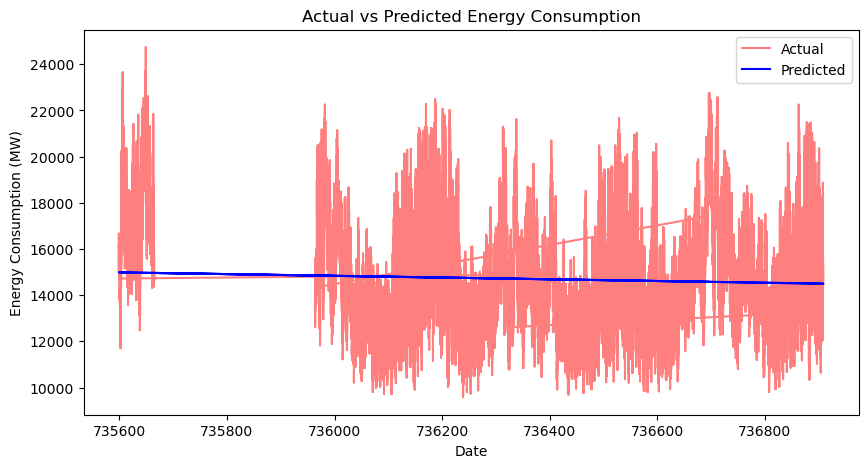

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(test_df['Date'], test_df['AEP_MW'], label='Actual', color='red', alpha=0.5)
plt.plot(test_df['Date'], predictions, label='Predicted', color='blue')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

### Model Evaluation

Evaluating the model using Mean Squared Error (MSE) and R² Score
- High MSE and negative R² score indicate poor performance, as the model fails to learn from the data


In [23]:
#Calculating mean squared error and r squared error 
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 6592019.565986139
R^2 Score: -0.00011300030399152838


### Conclusion

The linear regression model fails to capture the seasonal patterns in the energy consumption data, as evidenced by the flat predictions and poor evaluation metrics. This demonstrates that linear regression is not suitable for this type of data. A more advanced approach, such as time-series modeling with ARIMA, Prophet, or LSTM, would likely perform better by accounting for seasonalities and trends.
